In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


1. Import Library

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from keras.optimizers import Adam

2. Load Dataset

In [4]:
load_data= '\Data Cuaca\datacuaca.csv'

3. Membaca Dataset

In [5]:
data = pd.read_csv('\Infinte Learning\MASSIVE PROJECT\Data Cuaca\datacuaca.csv')  # Ubah 'nama_dataset.csv' sesuai dengan nama file dataset Anda

4. Menampilkan Dataset

In [6]:
print(data)
data.info()

            Date    Tn    Tx    RR
0     2018-01-01  24.8  29.4  49.3
1     2018-01-02  23.6  30.7  61.0
2     2018-01-03  23.3  30.5  52.3
3     2018-01-04  22.0  30.1  16.7
4     2018-01-05  22.5  29.2  76.6
...          ...   ...   ...   ...
2217  2024-01-27  25.1  30.2   0.2
2218  2024-01-28  23.8  29.7  56.8
2219  2024-01-29  24.0  30.6  62.6
2220  2024-01-30  24.8  31.2   1.8
2221  2024-01-31  24.1  30.7   6.6

[2222 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2222 non-null   object 
 1   Tn      2222 non-null   float64
 2   Tx      2222 non-null   float64
 3   RR      2222 non-null   float64
dtypes: float64(3), object(1)
memory usage: 69.6+ KB


5. Persiapan data LSTM

In [7]:
# 2. Persiapan Data untuk Model LSTM
# Pisahkan fitur (features) dan label (labels)
features = data[['Tn', 'Tx', 'RR']]
labels = data[['Tn', 'Tx', 'RR']]

 6. Pisahkan data menjadi data latih dan data uji

In [8]:
# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

7. Pemodelan dengan LSTM menggunakan TensorFlow

In [9]:
# 3. Pemodelan dengan LSTM menggunakan TensorFlow
# Tentukan jumlah time steps (jumlah langkah waktu) dan jumlah fitur
n_timesteps = 1  # Untuk keperluan contoh sederhana, kita akan menggunakan 1 time step
n_features = 3    # Jumlah fitur: temperatur minimum, temperatur maksimum, dan curah hujan

8. Tentukan model LSTM itu sendiri

In [10]:
# Tentukan model LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, activation='relu', return_sequences=True, input_shape=(n_timesteps, n_features)),
    tf.keras.layers.LSTM(units=50, activation='relu'),
    tf.keras.layers.Dense(units=3)  # Output layer dengan 3 neuron untuk tiga parameter cuaca
])

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9. Kompilasi model LSTM

In [11]:
# Kompilasi model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

In [12]:
# Reshape data for LSTM
X_train_reshaped = X_train.values.reshape(-1, n_timesteps, n_features)
X_test_reshaped = X_test.values.reshape(-1, n_timesteps, n_features)

10. Melatih model dengan data yang ada

In [13]:
# 4. Pelatihan Model
# Latih model
history = model.fit(X_train.values.reshape(-1, n_timesteps, n_features), y_train, epochs=300, batch_size=32, validation_data=(X_test.values.reshape(-1, n_timesteps, n_features), y_test))

Epoch 1/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 492468.5625 - val_loss: 464600.5000
Epoch 2/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 259361.8438 - val_loss: 82538.5625
Epoch 3/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43499.4492 - val_loss: 424.2013
Epoch 4/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 311.5016 - val_loss: 2.7789
Epoch 5/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8390 - val_loss: 2.3129
Epoch 6/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6739 - val_loss: 2.1047
Epoch 7/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6939 - val_loss: 2.0955
Epoch 8/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3197 - val_loss: 2.0381
Epoch 9/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3356 - val_loss: 2.0363
Epoch 10/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2557 - val_loss: 1.9847
Epoch 11/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2086 - val_loss: 1.9550
Epoch 12/300
56/56 ━━━━━━━━━━━━━━━

11. Evaluasi model AI yang ada

In [14]:
# 5. Evaluasi Model
# Evaluasi model
loss = model.evaluate(X_test.values.reshape(-1, n_timesteps, n_features), y_test)
print("Mean Squared Error (MSE):", loss)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0211 
Mean Squared Error (MSE): 1.1158705949783325


12. Prediksi Cuaca

In [15]:
# 6. Prediksi Kondisi Cuaca
# Gunakan model LSTM untuk memprediksi kondisi cuaca
input_data = np.array([[20, 30, 5]])  # Contoh data input: temperatur minimum = 20, temperatur maksimum = 30, curah hujan = 5
prediksi_cuaca = model.predict(input_data.reshape(-1, n_timesteps, n_features))
print("Prediksi kondisi cuaca (Minimum Temperature, Maximum Temperature, Rainfall):", prediksi_cuaca)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
Prediksi kondisi cuaca (Minimum Temperature, Maximum Temperature, Rainfall): [[20.045391  29.977743   4.9849153]]


13. Melakukan Evaluasi Tambahan

In [16]:
# 7. Evaluasi tambahan
# Hitung dan cetak Mean Absolute Error (MAE) dan R-squared
y_pred = model.predict(X_test.values.reshape(-1, n_timesteps, n_features))
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r_squared)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
Mean Absolute Error (MAE): 0.14984573166580226
R-squared: 0.848099946975708


14. Melakukan Plotting Metrik Evaluasi dalam bentuk Grafik Batang

In [17]:
# Plotting metrik evaluasi dalam bentuk grafik batang
metrics = ['MSE', 'R-squared', 'MAE']
values = [loss, r_squared, mae]

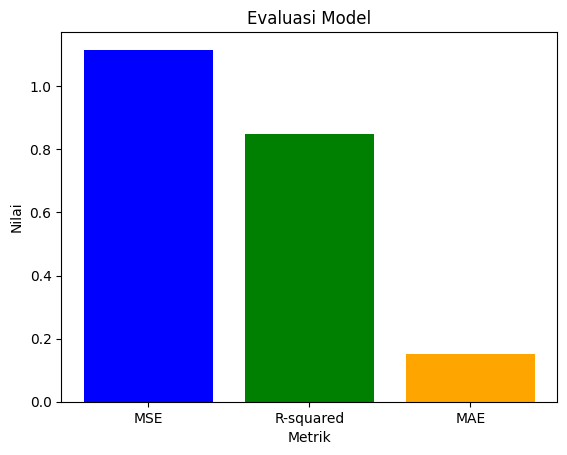

In [18]:
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.title('Evaluasi Model')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.show()

In [19]:
# Plotting prediksi untuk setiap fitur (Minimum Temperature, Maximum Temperature, Rainfall)
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

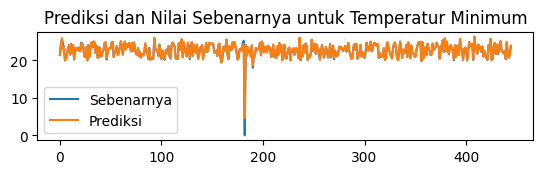

In [20]:
# Plot temperatur minimum
plt.subplot(3, 1, 1)
plt.plot(y_test.iloc[:, 0].values, label='Sebenarnya')
plt.plot(y_pred[:, 0], label='Prediksi')
plt.title('Prediksi dan Nilai Sebenarnya untuk Temperatur Minimum')
plt.legend()

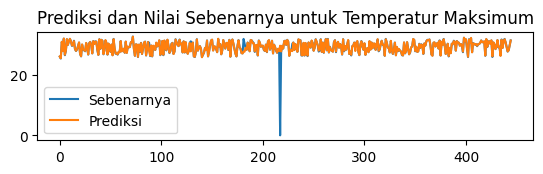

In [21]:
# Plot temperatur maksimum
plt.subplot(3, 1, 2)
plt.plot(y_test.iloc[:, 1].values, label='Sebenarnya')
plt.plot(y_pred[:, 1], label='Prediksi')
plt.title('Prediksi dan Nilai Sebenarnya untuk Temperatur Maksimum')
plt.legend()


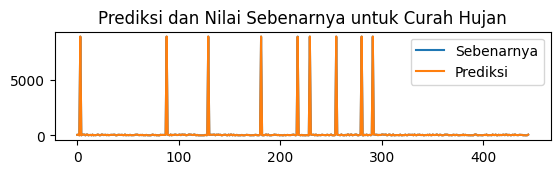

In [22]:
# Plot curah hujan
plt.subplot(3, 1, 3)
plt.plot(y_test.iloc[:, 2].values, label='Sebenarnya')
plt.plot(y_pred[:, 2], label='Prediksi')
plt.title('Prediksi dan Nilai Sebenarnya untuk Curah Hujan')
plt.legend()

**Save Model**

In [24]:
tf.saved_model.save(model, 'lstm_model')

INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets
